In [1]:
!unzip 'yawning.zip'

Streaming output truncated to the last 5000 lines.
  inflating: no yawn/2881.jpg        
  inflating: no yawn/2882.jpg        
  inflating: no yawn/2883.jpg        
  inflating: no yawn/2884.jpg        
  inflating: no yawn/2885.jpg        
  inflating: no yawn/2886.jpg        
  inflating: no yawn/2887.jpg        
  inflating: no yawn/2888.jpg        
  inflating: no yawn/2889.jpg        
  inflating: no yawn/2890.jpg        
  inflating: no yawn/2891.jpg        
  inflating: no yawn/2892.jpg        
  inflating: no yawn/2893.jpg        
  inflating: no yawn/2894.jpg        
  inflating: no yawn/2895.jpg        
  inflating: no yawn/2896.jpg        
  inflating: no yawn/2897.jpg        
  inflating: no yawn/2898.jpg        
  inflating: no yawn/2899.jpg        
  inflating: no yawn/2900.jpg        
  inflating: no yawn/2901.jpg        
  inflating: no yawn/2902.jpg        
  inflating: no yawn/2903.jpg        
  inflating: no yawn/2904.jpg        
  inflating: no yawn/2905.jpg        

In [1]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [3]:
# Create data generators for training and validation
train_data_gen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_data_gen = ImageDataGenerator(rescale=1./255)

In [3]:
img_size = (224, 224)

In [ ]:
data_dir = '/content'
# Load the images and labels from the data folder
x = []
y = []
for label, folder_name in enumerate(['no yawn', 'yawn']):
    folder_path = os.path.join(data_dir, folder_name)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        # Check if the image was loaded correctly
        if img is not None:
            img = cv2.resize(img, img_size)
            x.append(img)
            y.append(label)
        else:
            print(f"Failed to load image: {img_path}") # Print a warning for failed images

# Convert the images and labels to numpy arrays
x = np.array(x)
y = np.array(y)

In [5]:
x_temp, x_test, y_temp, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

In [6]:
# Print shape of each
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3071, 224, 224, 3)
y_train shape: (3071,)
X_val shape: (1024, 224, 224, 3)
y_val shape: (1024,)
X_test shape: (1024, 224, 224, 3)
y_test shape: (1024,)


In [4]:
# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
from tensorflow.keras.callbacks import EarlyStopping
# Define the early stopping criteria
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [5]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,396,609 (169.36 MB)

 Trainable params: 44,396,609 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Train the model with EarlyStopping
history = model.fit(
    train_data_gen.flow(x_train, y_train, batch_size=32),
    validation_data=val_data_gen.flow(x_val, y_val),
    epochs=50,
    callbacks=[early_stop],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 46s 398ms/step - accuracy: 0.7094 - loss: 0.6074 - val_accuracy: 0.9268 - val_loss: 0.2350
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 70s 340ms/step - accuracy: 0.9104 - loss: 0.2350 - val_accuracy: 0.9541 - val_loss: 0.1191
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 34s 347ms/step - accuracy: 0.9281 - loss: 0.1927 - val_accuracy: 0.9531 - val_loss: 0.1192
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 346ms/step - accuracy: 0.9491 - loss: 0.1590 - val_accuracy: 0.9561 - val_loss: 0.1153
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 347ms/step - accuracy: 0.9511 - loss: 0.1363 - val_accuracy: 0.9541 - val_loss: 0.1119
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 41s 348ms/step - accuracy: 0.9601 - loss: 0.1224 - val_accuracy: 0.9414 - val_loss: 0.1569
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 346ms/step - accuracy: 0.9533 - loss: 0.1341 - val_accuracy: 0.9629 - val_loss: 0.0935
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 338ms/step - accuracy: 0.9670 - loss: 0.1005 - val_accu

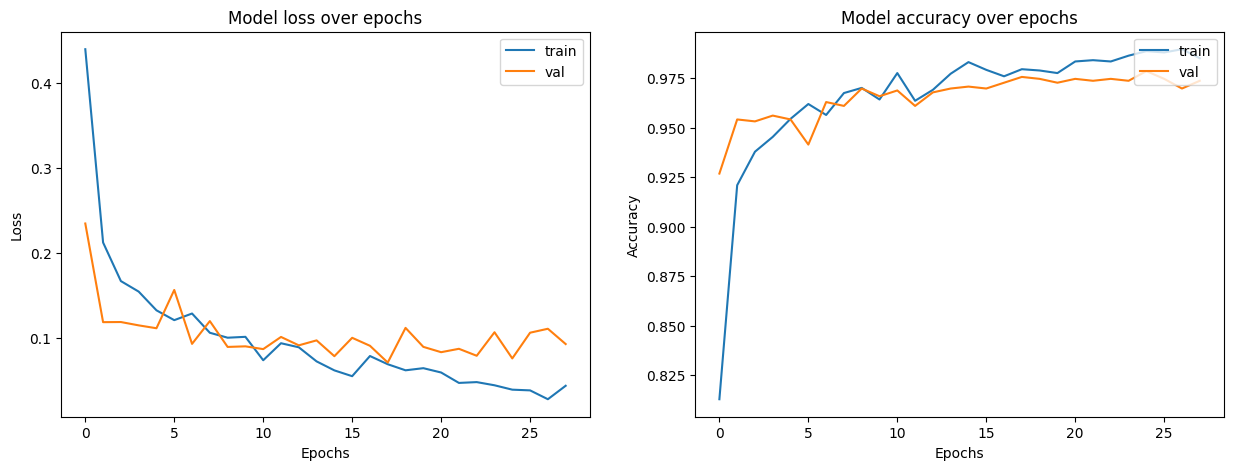

In [12]:
# Initialize the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# Plot model loss during training
ax1.plot(history.history["loss"])
ax1.plot(history.history["val_loss"])
ax1.legend(["train", "val"], loc="upper right")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.set_title("Model loss over epochs")

# Plot model accuracy during training
ax2.plot(history.history["accuracy"])
ax2.plot(history.history["val_accuracy"])
ax2.legend(["train", "val"], loc="upper right")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.set_title("Model accuracy over epochs")
plt.show()

In [13]:
# Normalize test data
x_test_scaled = x_test / 255.0
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test, verbose=0)
# Print results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.0885
Test Accuracy: 0.9717


In [14]:
model.save('yawn_detection_model.h5')